# Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf


## Importing Data

In [2]:
path = r'C:\Users\smerg\esport_earning_2018-2023'

merged = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'EsportsData.cvs'))
cleaned = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'EsportsDataCleaned.cvs'))

In [4]:
# Display basic statistics for the numerical columns
print(cleaned.describe())


       Unnamed: 0.1   Unnamed: 0  TotalEarnings  OfflineEarnings  \
count    557.000000   557.000000   5.570000e+02     5.570000e+02   
mean    5505.425494  5505.425494   1.484256e+08     1.151840e+08   
std     2215.574849  2215.574849   1.205331e+08     1.123911e+08   
min     1987.000000  1987.000000   5.479977e+04     5.479977e+04   
25%     4121.000000  4121.000000   3.461673e+07     1.884003e+07   
50%     4424.000000  4424.000000   1.050111e+08     9.081567e+07   
75%     8545.000000  8545.000000   3.371080e+08     2.982906e+08   
max     8932.000000  8932.000000   3.371080e+08     2.982906e+08   

       PercentOffline  TotalPlayers  TotalTournaments      Earnings  \
count      557.000000    557.000000        557.000000  5.570000e+02   
mean         0.708178   5934.960503       1835.267504  1.214377e+06   
std          0.206102   2462.434876        755.817642  3.626997e+06   
min          0.286745     66.000000          4.000000  2.500000e+01   
25%          0.544247   4047.000

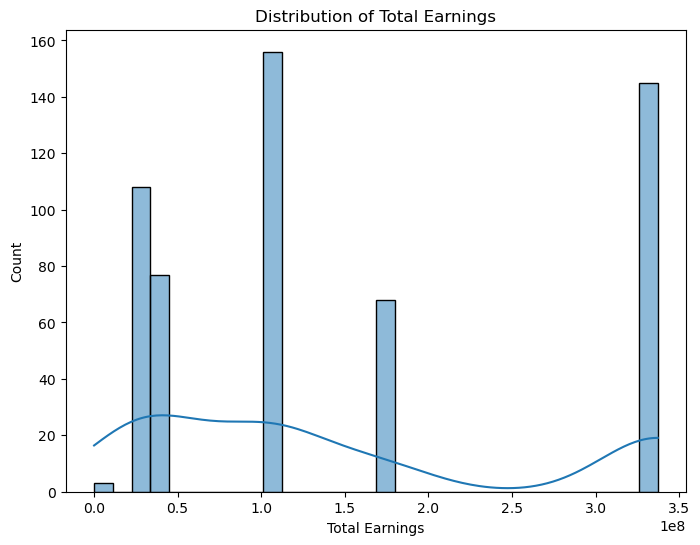

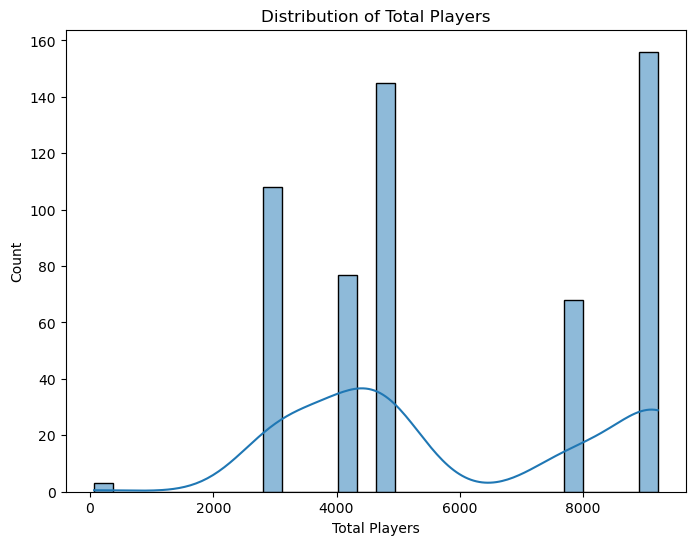

In [7]:
# Distribution plot for Total Earnings
plt.figure(figsize=(8, 6))
sns.histplot(cleaned['TotalEarnings'], bins=30, kde=True)
plt.title('Distribution of Total Earnings')
plt.xlabel('Total Earnings')
plt.show()

# Distribution plot for Total Players
plt.figure(figsize=(8, 6))
sns.histplot(cleaned['TotalPlayers'], bins=30, kde=True)
plt.title('Distribution of Total Players')
plt.xlabel('Total Players')
plt.show()


In [9]:
# Check the data types of your columns
print(cleaned.dtypes)

# Remove non-numeric columns (like 'Game', 'Genre', 'Country') from the analysis
data_numerical = cleaned.select_dtypes(include=['float64', 'int64'])

# Check if the dataframe now only has numeric columns
print(data_numerical.head())


Unnamed: 0.1          int64
Unnamed: 0            int64
Game                 object
ReleaseDate          object
Genre                object
TotalEarnings       float64
OfflineEarnings     float64
PercentOffline      float64
TotalPlayers          int64
TotalTournaments      int64
Country              object
Date                 object
Earnings            float64
Players             float64
Tournaments         float64
EarningsGrowth      float64
dtype: object
   Unnamed: 0.1  Unnamed: 0  TotalEarnings  OfflineEarnings  PercentOffline  \
0          1987        1987       54799.77         54799.77        1.000000   
1          1988        1988       54799.77         54799.77        1.000000   
2          1989        1989       54799.77         54799.77        1.000000   
3          3044        3044    34616725.38      18840032.08        0.544247   
4          3045        3045    34616725.38      18840032.08        0.544247   

   TotalPlayers  TotalTournaments  Earnings  Players  Tournamen

In [12]:
# One-hot encode the 'Genre' column (if needed)
data_encoded = pd.get_dummies(cleaned, columns=['Genre', 'Country'], drop_first=True)

# Check the encoded data
print(data_encoded.head())


   Unnamed: 0.1  Unnamed: 0          Game ReleaseDate  TotalEarnings  \
0          1987        1987  Call of Duty  2003-01-01       54799.77   
1          1988        1988  Call of Duty  2003-01-01       54799.77   
2          1989        1989  Call of Duty  2003-01-01       54799.77   
3          3044        3044     Overwatch  2016-01-01    34616725.38   
4          3045        3045     Overwatch  2016-01-01    34616725.38   

   OfflineEarnings  PercentOffline  TotalPlayers  TotalTournaments  \
0         54799.77        1.000000            66                 4   
1         54799.77        1.000000            66                 4   
2         54799.77        1.000000            66                 4   
3      18840032.08        0.544247          4047               835   
4      18840032.08        0.544247          4047               835   

         Date  Earnings  Players  Tournaments  EarningsGrowth  \
0  2004-08-01  50000.00     51.0          1.0             NaN   
1  2005-08-01   

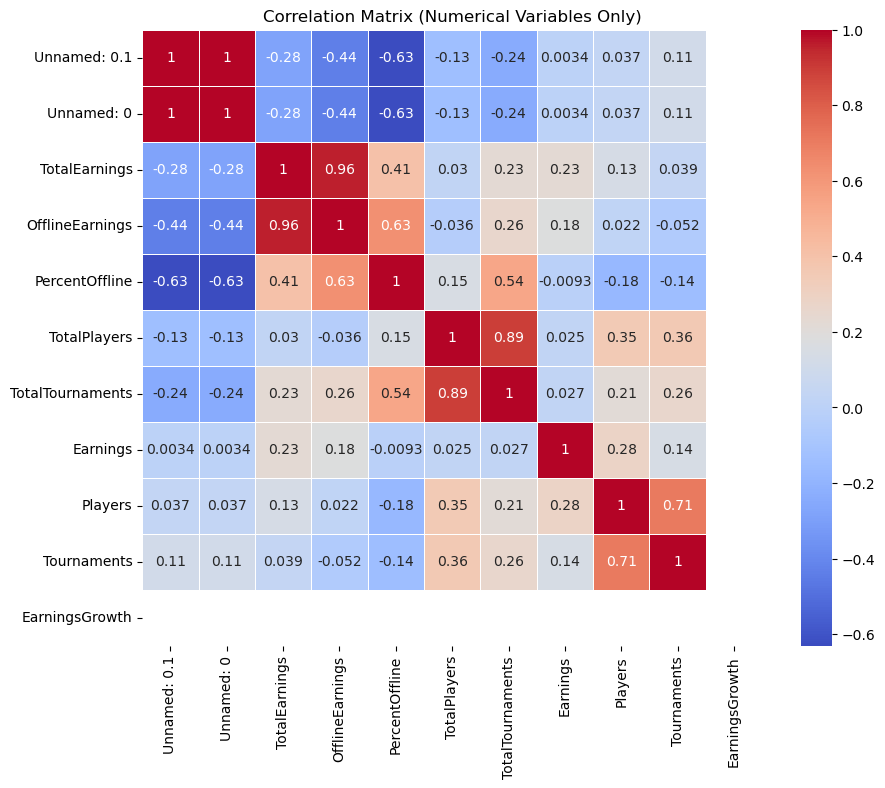

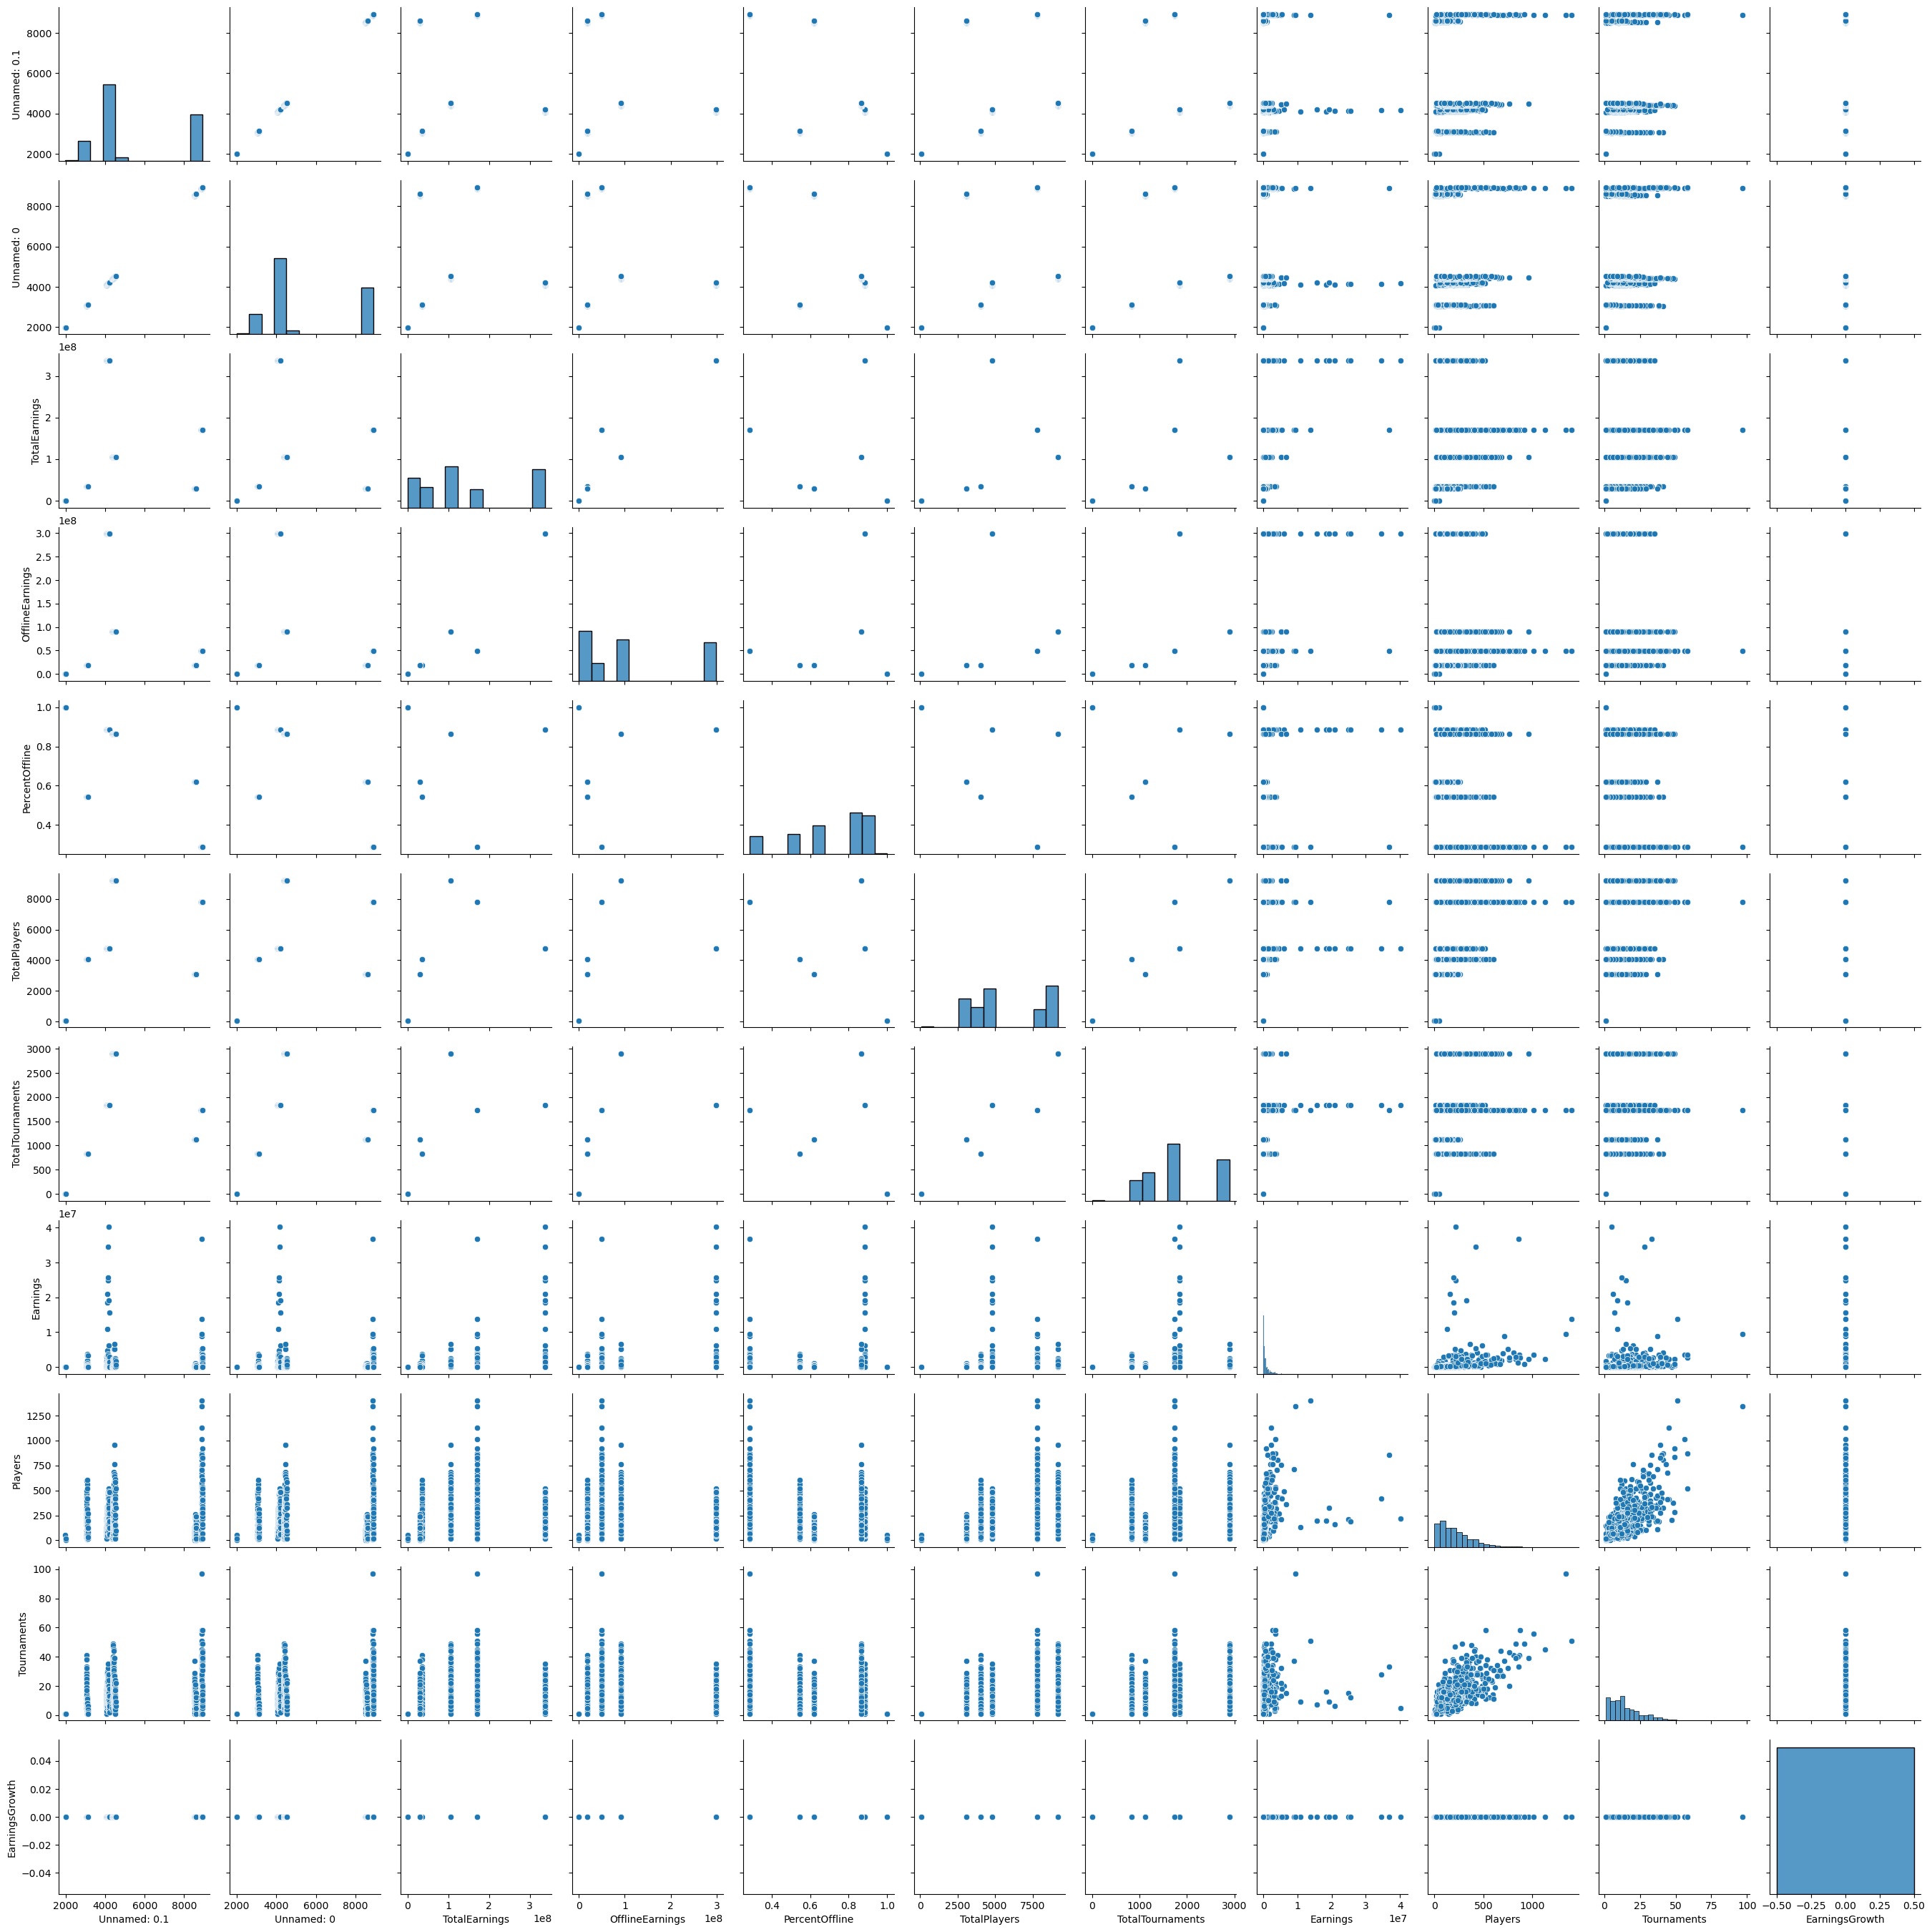

In [13]:
# Correlation matrix after removing non-numeric columns
corr_matrix = data_numerical.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Numerical Variables Only)')
plt.show()

# Pair plot for numerical columns only
sns.pairplot(data_numerical)
plt.show()


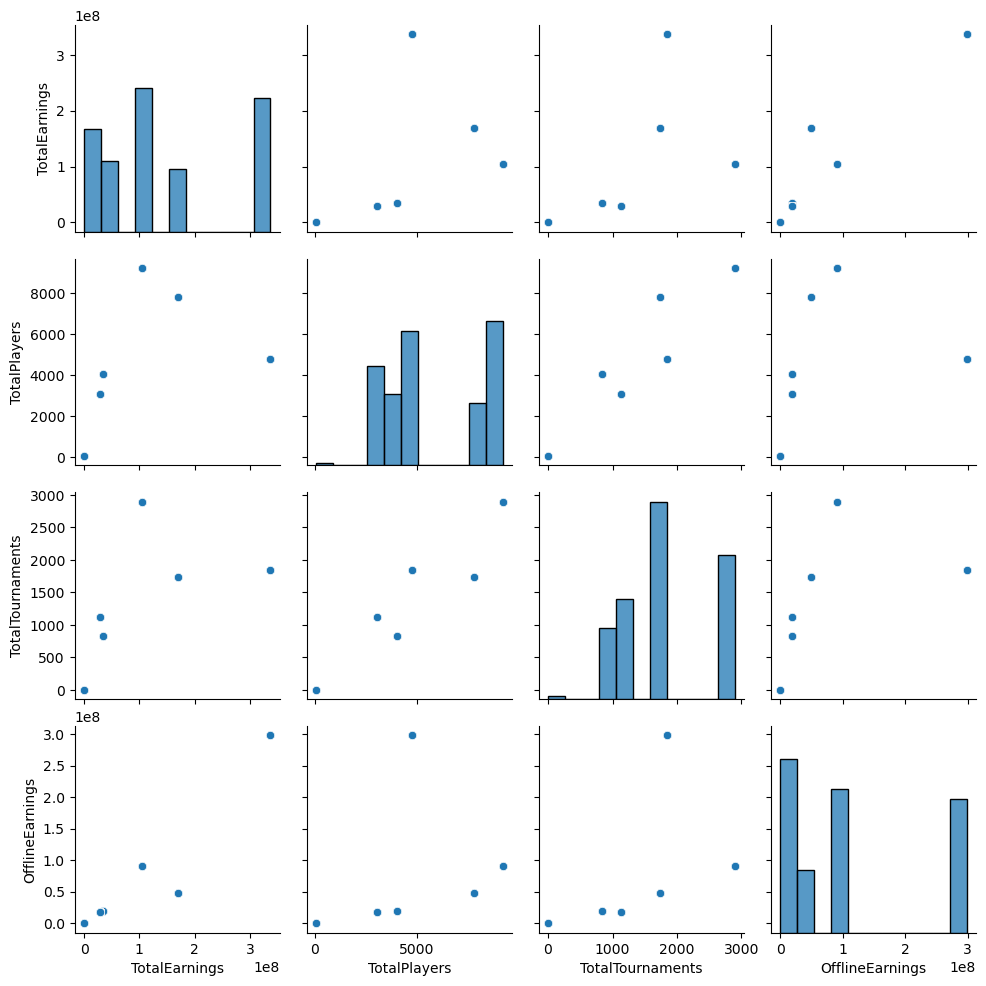

In [14]:
# Pair plot for selected numerical columns
sns.pairplot(cleaned[['TotalEarnings', 'TotalPlayers', 'TotalTournaments', 'OfflineEarnings']])
plt.show()


In [25]:
# Verify the columns of your DataFrame
print(cleaned.columns)


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Game', 'ReleaseDate', 'Genre',
       'TotalEarnings', 'OfflineEarnings', 'PercentOffline', 'TotalPlayers',
       'TotalTournaments', 'Country', 'Date', 'Earnings', 'Players',
       'Tournaments', 'EarningsGrowth'],
      dtype='object')


In [26]:
# Check for missing values in the relevant columns
print(cleaned[['Genre', 'TotalEarnings']].isnull().sum())


Genre            0
TotalEarnings    0
dtype: int64


In [27]:
# Drop rows where 'Genre' or 'TotalEarnings' are missing
data_cleaned = cleaned.dropna(subset=['Genre', 'TotalEarnings'])


In [28]:
# Check the data types
print(cleaned.dtypes)


Unnamed: 0.1          int64
Unnamed: 0            int64
Game                 object
ReleaseDate          object
Genre                object
TotalEarnings       float64
OfflineEarnings     float64
PercentOffline      float64
TotalPlayers          int64
TotalTournaments      int64
Country              object
Date                 object
Earnings            float64
Players             float64
Tournaments         float64
EarningsGrowth      float64
dtype: object


In [29]:
# Convert 'TotalEarnings' to numeric (if needed)
cleaned['TotalEarnings'] = pd.to_numeric(cleaned['TotalEarnings'], errors='coerce')


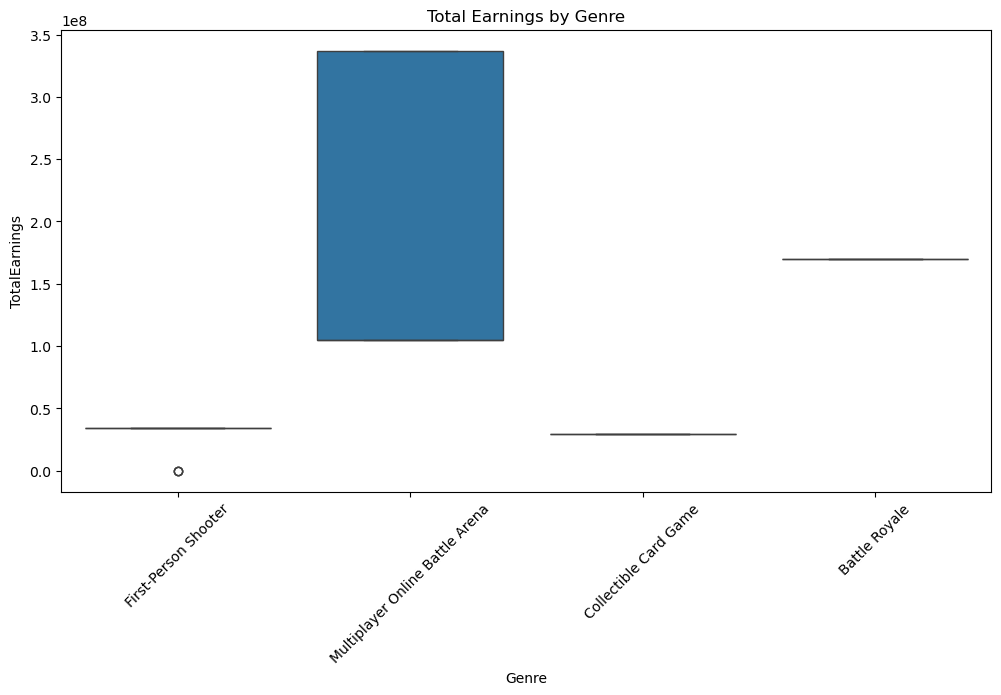

In [30]:
# Boxplot of Total Earnings by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='TotalEarnings', data=data_cleaned)
plt.title('Total Earnings by Genre')
plt.xticks(rotation=45)
plt.show()


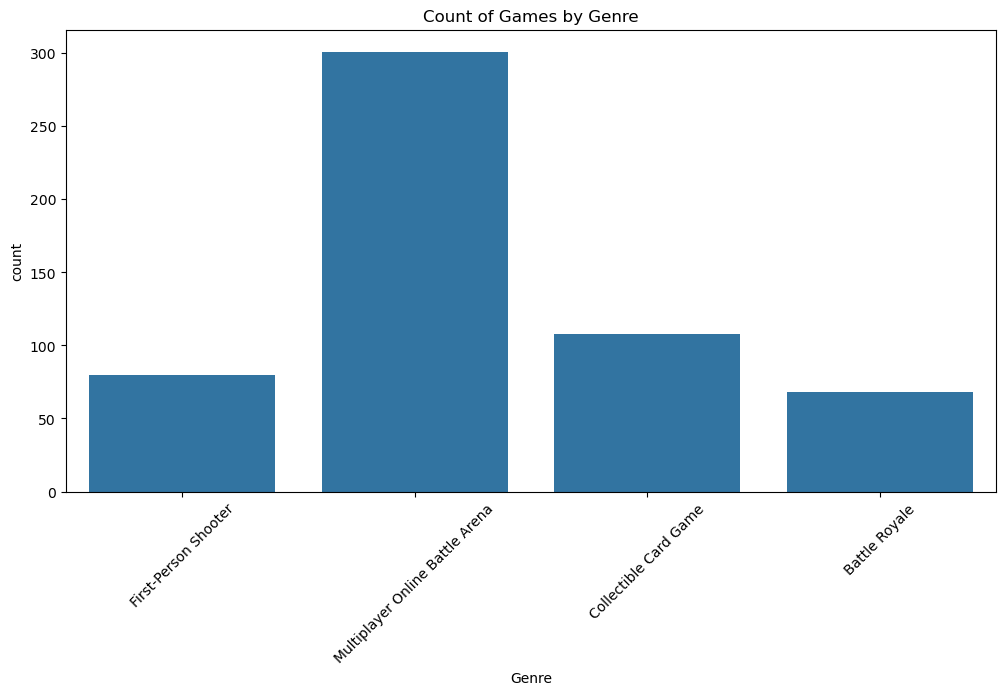

In [35]:
# Assuming 'cleaned' is the DataFrame that has been cleaned
plt.figure(figsize=(12, 6))

# Pass 'cleaned' DataFrame using the correct argument: data=cleaned
sns.countplot(x='Genre', data=cleaned)

plt.title('Count of Games by Genre')
plt.xticks(rotation=45)
plt.show()


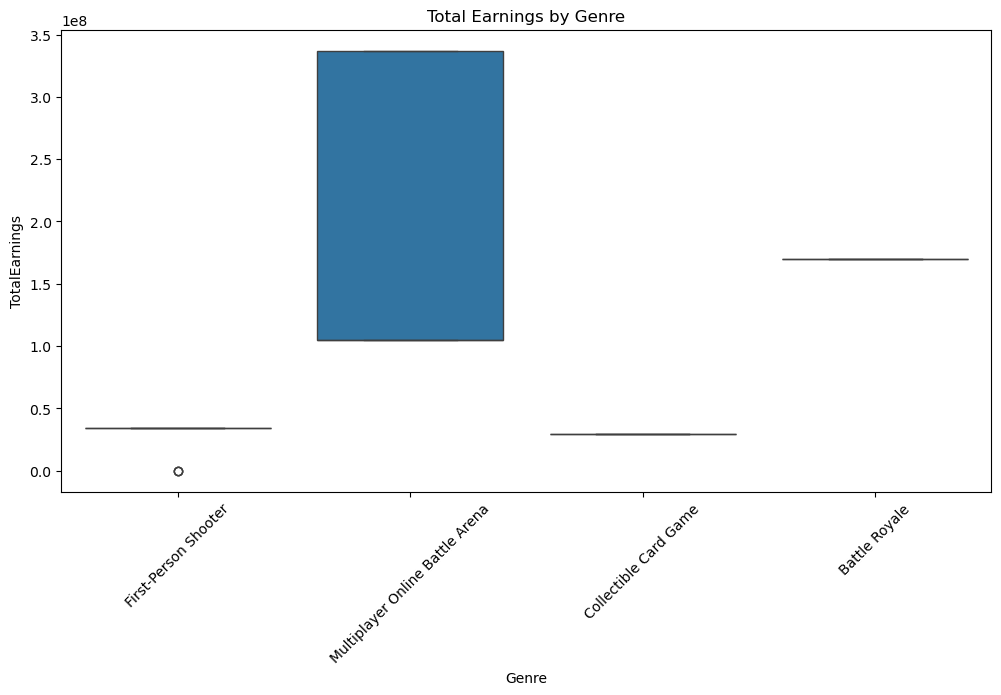

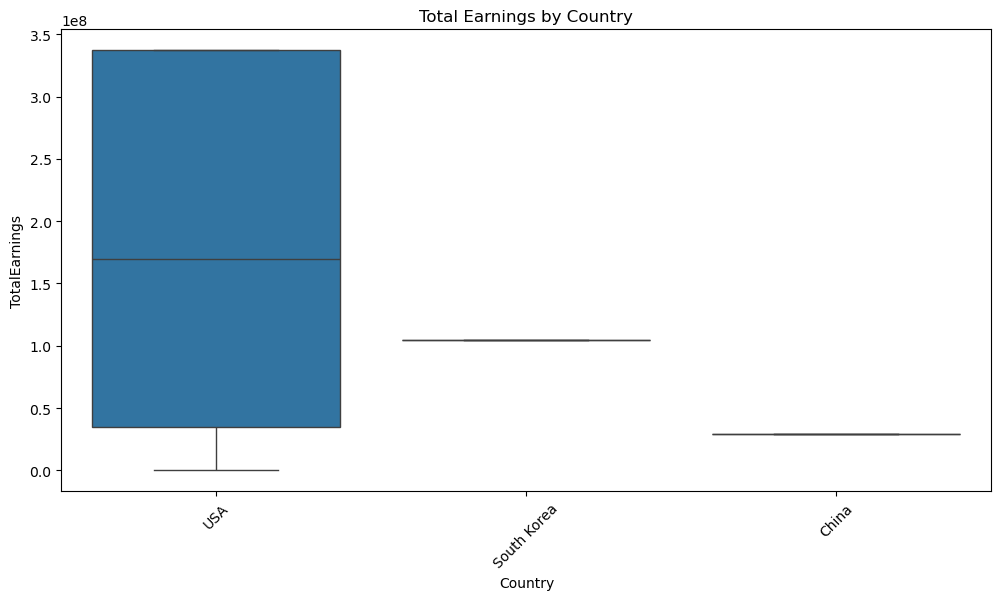

In [36]:
# Ensure data is cleaned and columns exist
data_cleaned = cleaned.dropna(subset=['Genre', 'Country', 'TotalEarnings'])

# Boxplot of Total Earnings by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='TotalEarnings', data=cleaned)
plt.title('Total Earnings by Genre')
plt.xticks(rotation=45)
plt.show()

# Boxplot of Total Earnings by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='TotalEarnings', data=cleaned)
plt.title('Total Earnings by Country')
plt.xticks(rotation=45)
plt.show()


In [37]:
# Load the dataset with historical esports data
data = cleaned

# Ensure the 'Date' column is properly formatted as a datetime object
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Sort the data by date
data = data.sort_index()

# Inspect the data
print(data.head())


            Unnamed: 0.1  Unnamed: 0               Game ReleaseDate  \
Date                                                                  
2004-08-01          1987        1987       Call of Duty  2003-01-01   
2005-08-01          1988        1988       Call of Duty  2003-01-01   
2006-03-01          1989        1989       Call of Duty  2003-01-01   
2010-09-01          4371        4371  League of Legends  2009-01-01   
2010-10-01          4372        4372  League of Legends  2009-01-01   

                                      Genre  TotalEarnings  OfflineEarnings  \
Date                                                                          
2004-08-01             First-Person Shooter   5.479977e+04         54799.77   
2005-08-01             First-Person Shooter   5.479977e+04         54799.77   
2006-03-01             First-Person Shooter   5.479977e+04         54799.77   
2010-09-01  Multiplayer Online Battle Arena   1.050111e+08      90815673.41   
2010-10-01  Multiplayer Onli

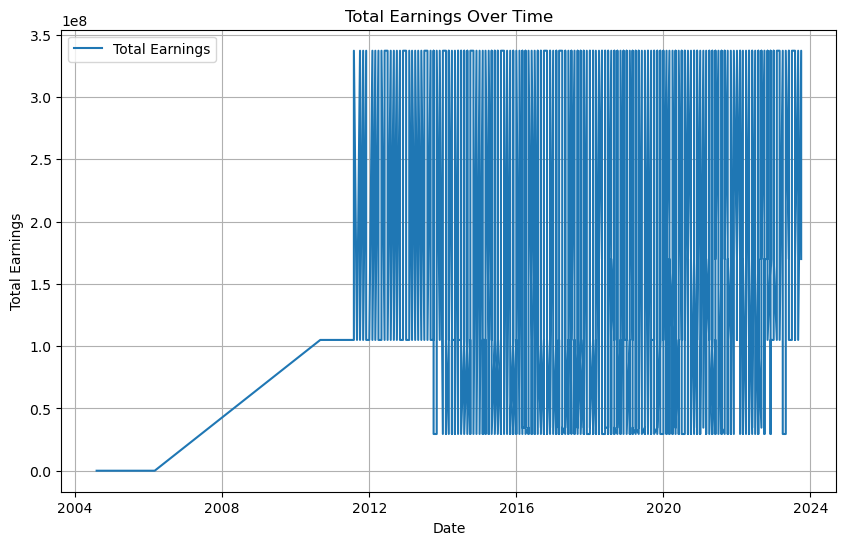

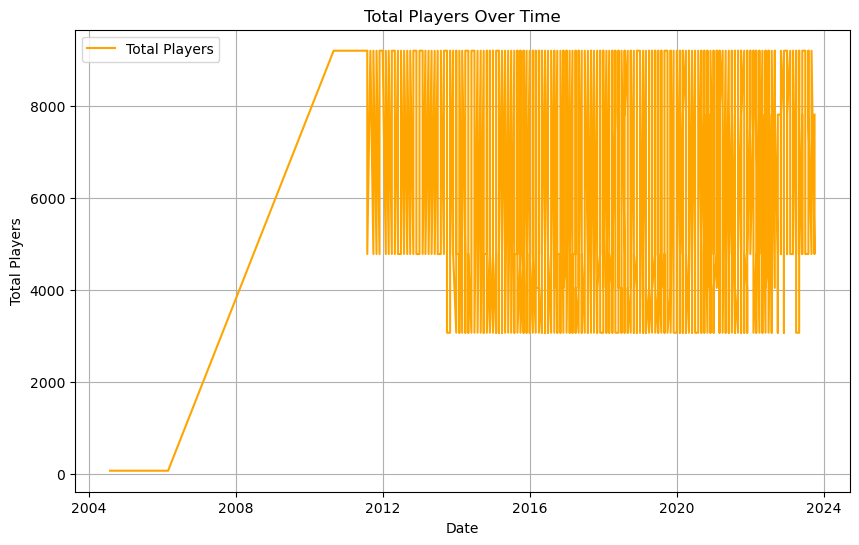

In [38]:
# Plotting Total Earnings over time
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['TotalEarnings'], label='Total Earnings')
plt.title('Total Earnings Over Time')
plt.xlabel('Date')
plt.ylabel('Total Earnings')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Total Players over time
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['TotalPlayers'], label='Total Players', color='orange')
plt.title('Total Players Over Time')
plt.xlabel('Date')
plt.ylabel('Total Players')
plt.legend()
plt.grid(True)
plt.show()


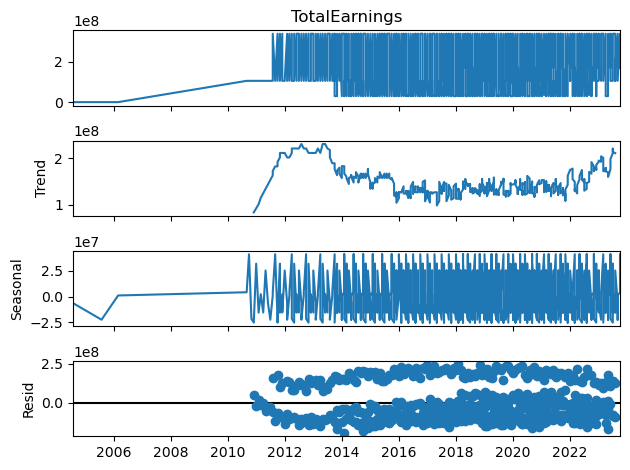

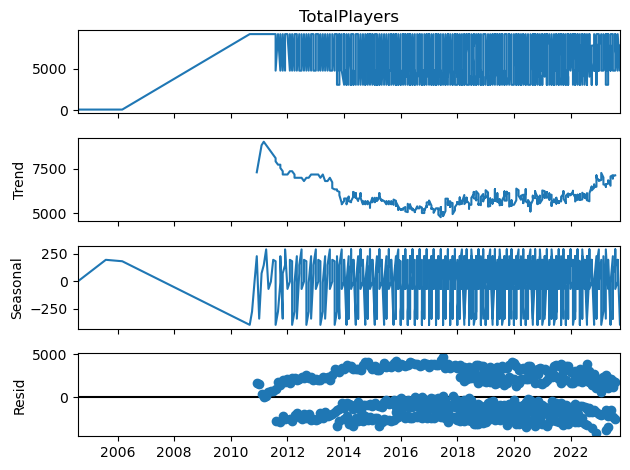

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series for Total Earnings
decomposition = seasonal_decompose(data['TotalEarnings'], model='additive', period=12)
decomposition.plot()
plt.show()

# Decompose the time series for Total Players
decomposition_players = seasonal_decompose(data['TotalPlayers'], model='additive', period=12)
decomposition_players.plot()
plt.show()


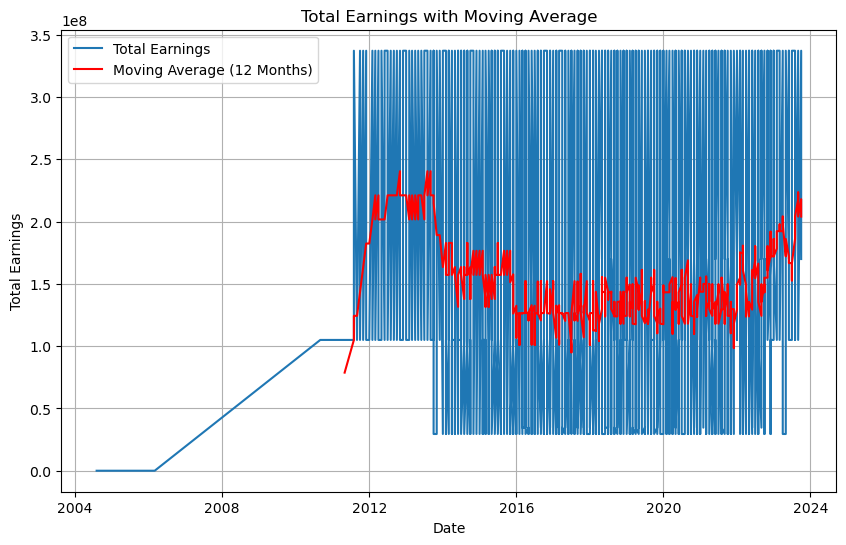

In [40]:
# Calculate a rolling mean to smooth the series
data['Earnings_MA'] = data['TotalEarnings'].rolling(window=12).mean()

# Plot the original series and the moving average
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['TotalEarnings'], label='Total Earnings')
plt.plot(data.index, data['Earnings_MA'], label='Moving Average (12 Months)', color='red')
plt.title('Total Earnings with Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Earnings')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\smerg\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\smerg\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\smerg\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\smerg\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_ind

                               SARIMAX Results                                
Dep. Variable:          TotalEarnings   No. Observations:                  557
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11129.787
Date:                Sun, 15 Sep 2024   AIC                          22265.573
Time:                        15:55:50   BIC                          22278.535
Sample:                             0   HQIC                         22270.636
                                - 557                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2331      0.066     -3.510      0.000      -0.363      -0.103
ma.L1         -0.9699      0.017    -58.775      0.000      -1.002      -0.938
sigma2      1.777e+16   2.72e-20   6.53e+35      0.0

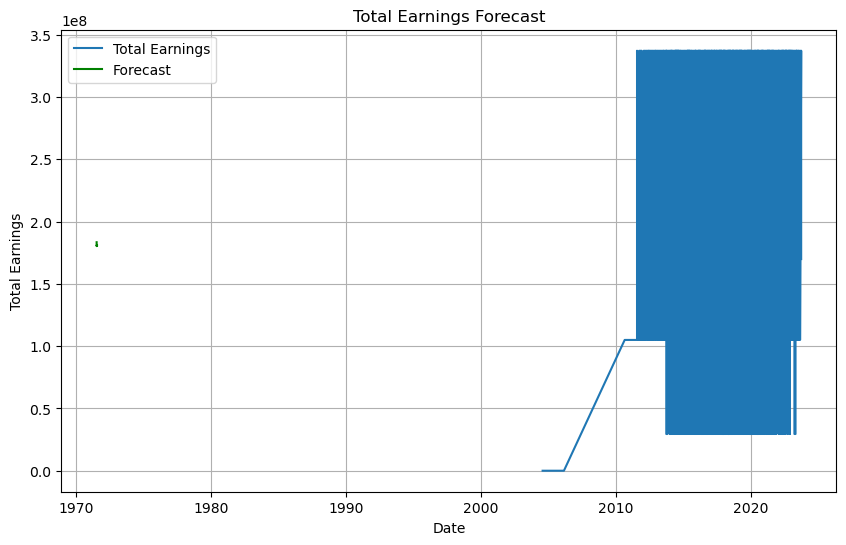

In [41]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model (p=1, d=1, q=1)
model = ARIMA(data['TotalEarnings'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecasting future values
forecast = model_fit.forecast(steps=12)  # Predict the next 12 time periods
print(forecast)

# Plot the actual data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['TotalEarnings'], label='Total Earnings')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.title('Total Earnings Forecast')
plt.xlabel('Date')
plt.ylabel('Total Earnings')
plt.legend()
plt.grid(True)
plt.show()
